In [2]:
%load_ext autoreload
%autoreload 2

In [91]:
import sys
import os
from os import path

sys.path.append( path.dirname( path.abspath('.') ) )

from ecog_py import dataloader, structures
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd


In [22]:
import h5py
import scipy
with h5py.File(os.path.join('data/evt/RawMatEvents.mat'), 'r') as f:
    print(f['Events'].keys())
    sampling_rate = list(f['Events']['SampleRate'])[0]
    #time=np.array(list(f['Events']['Time']))
    sweep_start = list(f['Events']['Sweep_Start'])[0]
    piezos = list(f['Events']['Piezos'])[0]
    #print(sweep_start)
    
print(sampling_rate)
    
fs = 24414.0625 # hz
fsds = 1000 # hz


sweep_start_ds = scipy.signal.resample(sweep_start, int(len(sweep_start)/(sampling_rate/fsds)))
sweep_start_ds = np.round(sweep_start_ds/5)*5

piezos_ds = scipy.signal.resample(piezos, int(len(piezos)/(sampling_rate/fsds)))
piezos_ds = np.round(piezos_ds)

<KeysViewHDF5 ['Licks', 'Piezos', 'SampleRate', 'Sweep_Info', 'Sweep_Start', 'Time']>
[48828.125]


In [95]:
df_trials = dataloader.load_trial_info('data/MP_EO2_A3_S0_trials.csv')

   TrNum  Segment  ISS0Time  Arm0Time  TrStartTime  TrEndTime  RWStartTime  \
0      0        0   9779809       133          133       1133          133   
1      1        0   9779809      1466         1466       2466         1466   
2      2        0   9779809      2833         2833       3833         2833   
3      3        0   9779809      4333         4333       5333         4333   
4      4        0   9779809      5766         5766       6766         5766   

   RWEndTime  StimOnsetTime  StimNum  Tone  TrType  LickInWindow  TrOutcome  \
0        133            233        5     0       0             0          4   
1       1466           1566        7     0       0             0          4   
2       2833           2933        1     0       0             0          4   
3       4333           4433        4     0       0             0          4   
4       5766           5866        6     0       0             0          4   

   RewardTime  NLicks  CumNRewards  CumVol  StimLayout  

In [96]:
df_stimuli = dataloader.load_stimuli_info('data/MP_EO2_A3_S0_stimuli.csv')

    Trial  Posn  StimElem  Time_ms   Ampl
0       0     1         5      100  250.0
1       1     1         7      100  250.0
2       2     1         1      100  250.0
3       3     1         4      100  250.0
4       4     1         6      100  250.0
5       5     1         4      100  250.0
6       6     1         2      100  250.0
7       7     1         3      100  250.0
8       8     1         5      100  250.0
9       9     1         6      100  250.0
10     10     1         1      100  250.0
11     11     1         8      100  250.0
12     12     1         6      100  250.0
13     13     1         2      100  250.0
14     14     1         8      100  250.0
15     15     1         4      100  250.0
16     16     1         6      100  250.0
17     17     1         1      100  250.0
18     18     1         2      100  250.0
19     19     1         1      100  250.0


In [97]:
df_header = dataloader.load_header_info('data/MP_EO2_A3_S0_header.csv')

                       1
ExptName       MP_EO2_A3
ExptCode         Default
SegmentNum             0
ISS0time         9779809
FirstTrialNum          0
LastTrialNum         199
StimLayout             1
Nstimuli               9
StimOrder              0
ArduinoMode            0
ITImean              1.5
ITIrange             0.0
MaxLicksLimit          0
RewardCalib_b        0.0
RewardCalib_m        0.0
UseGlobalGNG           0
A                      0
B                    100
C                      0
D                      5
E                      0
F                      0
G                      0
H                      0
I                      0
J                      0
K                      0
L                      0
M                      0
N                      1
O                      0
P                      0
Q                      0
R                      0
S                      0
T                      0
U                      0
V                      0
W                      0


In [98]:
ecog_ds = dataloader.load_ecog('data/ecog_test.npy', fs=24414.0625, fsds=3000)

File found, loading ECoG data...
Downsampling data... (this may take a while)
Cleaning up...
ECoG data loading complete!

Data summary: 
Original sampling frequency: 24414.0625 hz
New sampling frequency: 3000 hz
Num channels: 32
Num samples: 46080
Recording length: ~0 minutes


In [99]:
sweep_start, trial_indices = dataloader.load_trial_timings('data/sweep_start_test.npy', fs=24414.0625*2, fsds=3000)

File found, loading Sweep Start data...
Downsampling data...
Computing trial start / end indices
Trial timing loading complete!


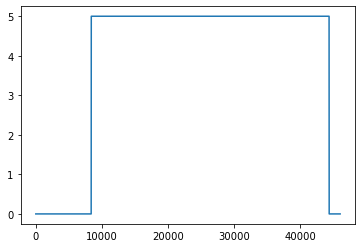

In [100]:
plt.plot(sweep_start)

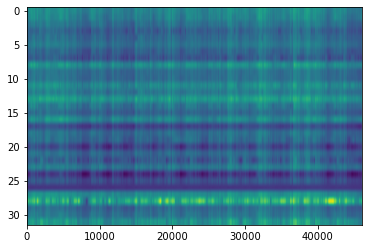

In [101]:
plt.imshow(ecog_ds.T, aspect='auto')

In [102]:
df_header

,ExptName,ExptCode,SegmentNum,ISS0time,FirstTrialNum,LastTrialNum,StimLayout,Nstimuli,StimOrder,ArduinoMode,ITImean,ITIrange,MaxLicksLimit,RewardCalib_b,RewardCalib_m,UseGlobalGNG,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,Nelements,PiezoLabel0,PiezoLabel1,PiezoLabel2,PiezoLabel3,PiezoLabel4,PiezoLabel5,PiezoLabel6,PiezoLabel7,PiezoLabel8,ElemPiezo0,ElemPiezo1,ElemPiezo2,ElemPiezo3,ElemPiezo4,ElemPiezo5,ElemPiezo6,ElemPiezo7,ElemPiezo8,ElemAmp0,ElemAmp1,ElemAmp2,ElemAmp3,ElemAmp4,ElemAmp5,ElemAmp6,ElemAmp7,ElemAmp8,ElemProb0,ElemProb1,ElemProb2,ElemProb3,ElemProb4,ElemProb5,ElemProb6,ElemProb7,ElemProb8,ElemDur0,ElemDur1,ElemDur2,ElemDur3,ElemDur4,ElemDur5,ElemDur6,ElemDur7,ElemDur8,ElemShape0,ElemShape1,ElemShape2,ElemShape3,ElemShape4,ElemShape5,ElemShape6,ElemShape7,ElemShape8,ElemRise0,ElemRise1,ElemRise2,ElemRise3,ElemRise4,ElemRise5,ElemRise6,ElemRise7,ElemRise8,ElemGNG0,ElemGNG1,ElemGNG2,ElemGNG3,ElemGNG4,ElemGNG5,ElemGNG6,ElemGNG7,ElemGNG8,StdStimOnset,StdStimN,StdStimISI
1,MP_EO2_A3,Default,0,9779809,0,199,1,9,0,0,1.5,0.0,0,0.0,0.0,0,0,100,0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9,C1,D1,E1,C2,D2,E2,C3,D3,E3,0,1,2,3,4,5,6,7,8,250,250,250,250,250,250,250,250,250,0,0,0,0,0,0,0,0,0,9,9,9,9,9,9,9,9,9,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,100,1,100


In [129]:
exp = structures.Experiment(df_header, df_trials, df_stimuli)

In [130]:
exp

Experiment: MP_EO2_A3
Number of segments: 1

In [131]:
exp.segments[0]

Segment Num: 0

Sweep_duration: 1000
Sweep_period: 1500
First Trial Num: 0
Last Trial Num: 199

Stim_layout: 1
Stim_onset: 100
Stim_isi: 100
Stim_Interval: 100
Stim_N: 1
Stim_Duration: [17 17 17 17 17 17 17 17 17]
Whisker_Map: ['C1' 'D1' 'E1' 'C2' 'D2' 'E2' 'C3' 'D3' 'E3']

In [86]:
df_trials

,TrNum,Segment,ISS0Time,Arm0Time,TrStartTime,TrEndTime,RWStartTime,RWEndTime,StimOnsetTime,StimNum,Tone,TrType,LickInWindow,TrOutcome,RewardTime,NLicks,CumNRewards,CumVol,StimLayout,StimOrder,Laser
0,0,0,9779809,133,133,1133,133,133,233,5,0,0,0,4,0,0,0,0,1,0,0
1,1,0,9779809,1466,1466,2466,1466,1466,1566,7,0,0,0,4,0,0,0,0,1,0,0
2,2,0,9779809,2833,2833,3833,2833,2833,2933,1,0,0,0,4,0,0,0,0,1,0,0
3,3,0,9779809,4333,4333,5333,4333,4333,4433,4,0,0,0,4,0,0,0,0,1,0,0
4,4,0,9779809,5766,5766,6766,5766,5766,5866,6,0,0,0,4,0,0,0,0,1,0,0
5,5,0,9779809,7233,7233,8233,7233,7233,7333,4,0,0,0,4,0,0,0,0,1,0,0
6,6,0,9779809,8716,8716,9716,8716,8716,8816,2,0,0,0,4,0,0,0,0,1,0,0
7,7,0,9779809,10183,10183,11183,10183,10183,10283,3,0,0,0,4,0,0,0,0,1,0,0
8,8,0,9779809,11666,11666,12666,11666,11666,11766,5,0,0,0,4,0,0,0,0,1,0,0
9,9,0,9779809,13150,13150,14150,13150,13150,13250,6,0,0,0,4,0,0,0,0,1,0,0


In [111]:
df_header

,ExptName,ExptCode,SegmentNum,ISS0time,FirstTrialNum,LastTrialNum,StimLayout,Nstimuli,StimOrder,ArduinoMode,ITImean,ITIrange,MaxLicksLimit,RewardCalib_b,RewardCalib_m,UseGlobalGNG,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,Nelements,PiezoLabel0,PiezoLabel1,PiezoLabel2,PiezoLabel3,PiezoLabel4,PiezoLabel5,PiezoLabel6,PiezoLabel7,PiezoLabel8,ElemPiezo0,ElemPiezo1,ElemPiezo2,ElemPiezo3,ElemPiezo4,ElemPiezo5,ElemPiezo6,ElemPiezo7,ElemPiezo8,ElemAmp0,ElemAmp1,ElemAmp2,ElemAmp3,ElemAmp4,ElemAmp5,ElemAmp6,ElemAmp7,ElemAmp8,ElemProb0,ElemProb1,ElemProb2,ElemProb3,ElemProb4,ElemProb5,ElemProb6,ElemProb7,ElemProb8,ElemDur0,ElemDur1,ElemDur2,ElemDur3,ElemDur4,ElemDur5,ElemDur6,ElemDur7,ElemDur8,ElemShape0,ElemShape1,ElemShape2,ElemShape3,ElemShape4,ElemShape5,ElemShape6,ElemShape7,ElemShape8,ElemRise0,ElemRise1,ElemRise2,ElemRise3,ElemRise4,ElemRise5,ElemRise6,ElemRise7,ElemRise8,ElemGNG0,ElemGNG1,ElemGNG2,ElemGNG3,ElemGNG4,ElemGNG5,ElemGNG6,ElemGNG7,ElemGNG8,StdStimOnset,StdStimN,StdStimISI
1,MP_EO2_A3,Default,0,9779809,0,199,1,9,0,0,1.5,0.0,0,0.0,0.0,0,0,100,0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9,C1,D1,E1,C2,D2,E2,C3,D3,E3,0,1,2,3,4,5,6,7,8,250,250,250,250,250,250,250,250,250,0,0,0,0,0,0,0,0,0,9,9,9,9,9,9,9,9,9,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,100,1,100


In [117]:
int(np.around(np.mean(np.diff(df_trials['TrStartTime']))/1000, decimals=1)*1000)

1500

In [118]:
int(np.around(np.mean(np.array(df_trials['TrEndTime']) - np.array(df_trials['TrStartTime']))/1000, decimals=1)*1000)

1000